In [1]:
%config ServerApp.iopub_data_rate_limit=3.0

import pandas as pd
import numpy as np
import librosa

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df1 = pd.read_csv("D:\\ACM\\MGC-Project 1\\features_3_sec.csv")
df2 = pd.read_csv("D:\\ACM\\MGC-Project 1\\features_30_sec.csv")
df = pd.concat([df1,df2])

In [3]:
df = df.drop('filename',axis=1)

In [4]:
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


<font size="5">Preprocessing</font>

In [5]:
df['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [6]:
df['label'] = df['label'].astype('category')
df['class_label'] = df['label'].cat.codes

In [7]:
lookup_genre_name = dict(zip(df.class_label.unique(), df.label.unique()))
lookup_genre_name

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [8]:
df['label'].unique()

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Categories (10, object): ['blues', 'classical', 'country', 'disco', ..., 'metal', 'pop', 'reggae', 'rock']

In [9]:
cols=list(df.columns)
cols.remove('label')
cols.remove('class_label')
df[cols]

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


<font size="5">Data Spliting For Training and Testing</font>

In [10]:
X = df.iloc[:,1:7]
print(X.head)
print(X.shape)
y = df['class_label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)


<bound method NDFrame.head of      chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0            0.335406         0.091048  0.130405  0.003521   
1            0.343065         0.086147  0.112699  0.001450   
2            0.346815         0.092243  0.132003  0.004620   
3            0.363639         0.086856  0.132565  0.002448   
4            0.335579         0.088129  0.143289  0.001701   
..                ...              ...       ...       ...   
995          0.352063         0.080487  0.079486  0.000345   
996          0.398687         0.075086  0.076458  0.000588   
997          0.432142         0.075268  0.081651  0.000322   
998          0.362485         0.091506  0.083860  0.001211   
999          0.358401         0.085884  0.054454  0.000336   

     spectral_centroid_mean  spectral_centroid_var  
0               1773.065032          167541.630869  
1               1816.693777           90525.690866  
2               1788.539719          111407.437613  
3            

<font size="5">Minimum-Maximum Normalization</font>

In [11]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#scaling must be applied to the testing set that we computed for training set
X_test_scaled = scaler.transform(X_test)

<font size="5">Feature importance using Random Forests</font>

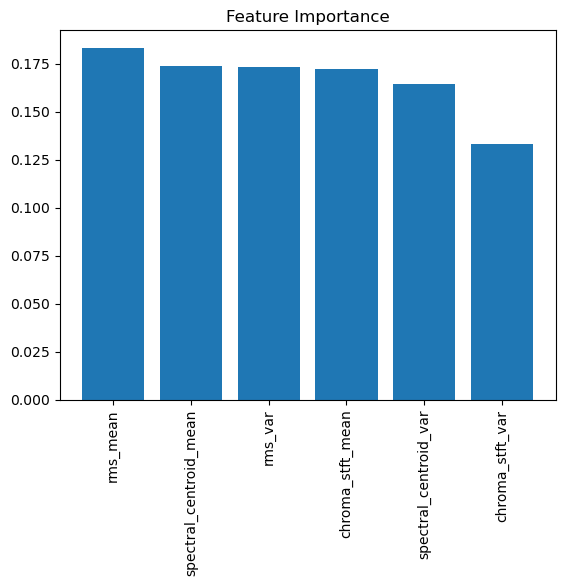

In [12]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1).fit(X_train_scaled, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

<font size="5">Feature importance using Decision Tree</font>

['rms_mean', 'spectral_centroid_mean', 'spectral_centroid_var', 'rms_var', 'chroma_stft_mean', 'chroma_stft_var']


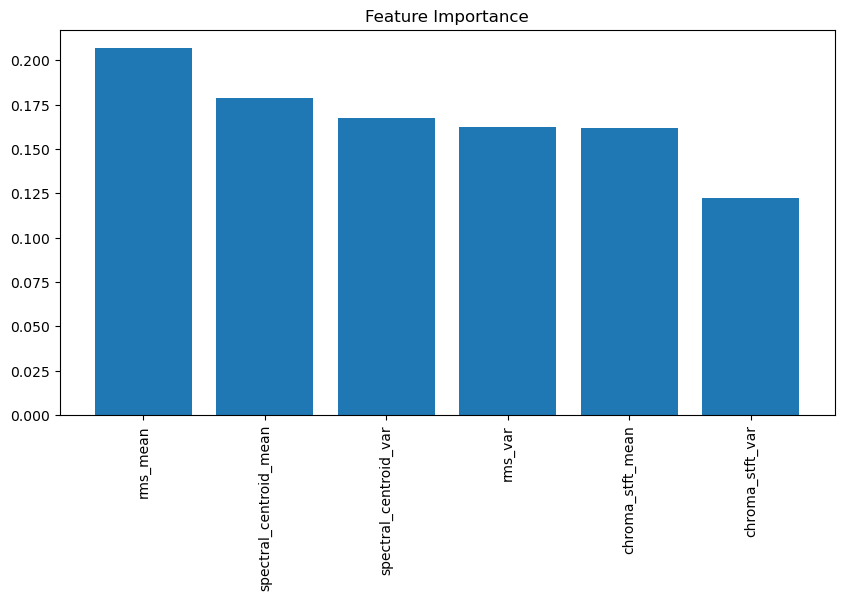

In [13]:
# Train the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train_scaled, y_train)

# Get feature importances and their indices
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
print(names)
# Plot feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()


In [14]:
imputer = SimpleImputer(strategy='most_frequent')
imputer_X_train = pd.DataFrame(imputer.fit_transform(X_train_scaled))

<font size="5">Feature importance using KNeighbors</font>

In [15]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(imputer_X_train,y_train)
knn.score(X_test_scaled,y_test)

0.6044889293296937

In [16]:
!pip install librosa

In [17]:
# Define the function to extract features from an audio file
def extract_features(filename):
    y, sr = librosa.load(filename)
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    features = {
        
        'chroma_stft_mean': np.mean(chroma_stft),
        'chroma_stft_var': np.var(chroma_stft),
        'rmse_mean': np.mean(rmse),
        'rmse_var': np.var(rmse),
        'spectral_centroid_mean': np.mean(spectral_centroid),
        'spectral_centroid_var': np.var(spectral_centroid),
    }


    feature_list = list(features.values())
    print("Number of extracted features:", len(feature_list))
    return feature_list

# Define the function to preprocess features using the scaler fitted on the training data
def preprocess_features(features):
    features = np.array(features).reshape(1, -1)
    features_scaled = scaler.transform(features)
    return features_scaled

# Define the function to predict genre using the trained SVM model
def predict_genre(filename):
    # Extract features from the audio file
    features = extract_features(filename)
    # Preprocess the features
    features_scaled = preprocess_features(features)
    # Predict genre using the trained SVM model
    prediction = knn.predict(features_scaled)
    # Convert the predicted label back to the original genre name
    predicted_genre = lookup_genre_name[prediction[0]]
    return predicted_genre

# Define the filename of the audio file you want to predict the genre for
filename = "D:\\ACM\\MGC-Project 1\\archive\\Data\\genres_original\\blues\\blues.00001.wav"
filename1 = "D:\\ACM\\MGC-Project 1\\archive\\Data\\genres_original\\pop\\pop.00001.wav"
# Predict the genre
predicted_genre = predict_genre(filename)
predicted_genre1 = predict_genre(filename1)
# Print the predicted genre
print("Predicted genre:", predicted_genre)
print("Predicted genre:", predicted_genre1)

Number of extracted features: 6


C:\Users\SNIGDHA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Number of extracted features: 6
Predicted genre: blues
Predicted genre: pop


C:\Users\SNIGDHA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
